# Clean data from test1_2.txt to dataframe and Plot Graph
- This program is used to export the txt file to dataframe in python. The txt is captured from the experiment#1 in Github. File location : https://github.com/TNatapon/Privacy_SDN_Edge_IoT/blob/main/PlanB/Experiment1/test1_2_edge2.txt

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io

## Input filename that you want to clean data

In [2]:
# this pandas version dose not support directlly loading the file from url.
url = 'https://github.com/TNatapon/Privacy_SDN_Edge_IoT/blob/main/PlanB/Experiment1/test1_2_edge2.txt'
filename = "/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/Experiment1/test1_2_edge2.txt"

# Functions for getting the throughput data from dataframe df


In [3]:
def getDataframeThru(df,start_row,measurement_interval,header_range):
    '''
    measurement_interval = 30 (sec) : 
    header_range = 10 lines
    start_row = 0 
    '''
    
    df1 = df.drop(labels=range(start_row, header_range), axis=0)
    df1t = df1.drop(labels=range(measurement_interval, len(df)), axis=0)
    
    return df1t

In [4]:
def getDatafromTxT(filename, headerrange):
    """
    Get dataframe from txt file:
    filename : xxx.txt
    headerrange : number of lines that needed to be removed. 
    
    return : df : datafame type
    """
    h = headerrange + 1
    skip_1 = list(range(0,h, 1))
    df = pd.read_csv(filename,
        skiprows=skip_1,
        header=None,
        delimiter=' ',
        skipinitialspace=True,
        error_bad_lines=False)
    return df

# Run fuctions¶
- df_all parameter is a collection of the througput data for 10 itterations of the measurement.
- The header of txt file consists of 9 lines. (we let headerrange = 9)
- The measured data every 1 sec for 30 sec per itteration. (we let measurement_intervel = 30).

In [5]:
headerrange = 10
df = getDatafromTxT(filename, headerrange)
print(df.head)

<bound method NDFrame.head of                                                     0         1            2   \
0                                                    [        5]    1.00-2.00   
1                                                    [        5]    2.00-3.00   
2                                                    [        5]    3.00-4.00   
3                                                    [        5]    4.00-5.00   
4                                                    [        5]    5.00-6.00   
..                                                 ...       ...          ...   
370                                                  [        5]  29.00-30.00   
371                                                  [        5]  30.00-30.09   
372                                                  [       ID]     Interval   
373                                              [SUM]  0.0-30.1          sec   
374  ----------------------------------------------...       NaN          NaN  

b'Skipping line 42: expected 12 fields, saw 25\nSkipping line 44: expected 12 fields, saw 13\nSkipping line 82: expected 12 fields, saw 25\nSkipping line 84: expected 12 fields, saw 13\nSkipping line 122: expected 12 fields, saw 25\nSkipping line 124: expected 12 fields, saw 13\nSkipping line 162: expected 12 fields, saw 25\nSkipping line 164: expected 12 fields, saw 13\nSkipping line 202: expected 12 fields, saw 25\nSkipping line 204: expected 12 fields, saw 13\nSkipping line 242: expected 12 fields, saw 25\nSkipping line 244: expected 12 fields, saw 13\nSkipping line 282: expected 12 fields, saw 25\nSkipping line 284: expected 12 fields, saw 13\nSkipping line 322: expected 12 fields, saw 25\nSkipping line 324: expected 12 fields, saw 13\nSkipping line 362: expected 12 fields, saw 25\nSkipping line 364: expected 12 fields, saw 13\nSkipping line 402: expected 12 fields, saw 25\nSkipping line 405: expected 12 fields, saw 13\n'


In [6]:
headerrange = 9

measurement_interval = 30 
start_row = 0 
df_all = df.drop(labels=range(1, len(df)), axis=0) # create df
print(df_all)


for i in range(0,9):
    print('i = ',i)
    if i == 0 :
        h = 0
        m = measurement_interval + h
        df1 = getDataframeThru(df,start_row,m,h)
        result = pd.concat([df_all,df1])
        df_all = df.drop(labels=0, axis=0)
        print('df1 = ',df1)
    else:
       
        h = m + headerrange -1
        m = measurement_interval + h 
        print('measurement_interval: ',m)
        print('hd = ', h)
        
        df1 = getDataframeThru(df,start_row,m,h)
        
        print('df1 = ',df1)
        result = pd.concat([df_all,df1])
        
    df_all = result

  0   1          2    3     4       5     6          7      8   9       10  \
0  [  5]  1.00-2.00  sec  1.75  MBytes  14.7  Mbits/sec  2.484  ms  0/1268   

     11  
0  (0%)  
i =  0
df1 =     0   1            2    3     4       5     6          7      8   9       10  \
0   [  5]    1.00-2.00  sec  1.75  MBytes  14.7  Mbits/sec  2.484  ms  0/1268   
1   [  5]    2.00-3.00  sec  2.05  MBytes  17.2  Mbits/sec  0.948  ms  0/1482   
2   [  5]    3.00-4.00  sec  2.02  MBytes  16.9  Mbits/sec  0.624  ms  0/1461   
3   [  5]    4.00-5.00  sec  2.21  MBytes  18.5  Mbits/sec  0.389  ms  0/1600   
4   [  5]    5.00-6.00  sec  2.03  MBytes  17.0  Mbits/sec  1.199  ms  0/1470   
5   [  5]    6.00-7.00  sec  2.29  MBytes  19.2  Mbits/sec  1.593  ms  0/1661   
6   [  5]    7.00-8.00  sec  1.94  MBytes  16.3  Mbits/sec  2.399  ms  0/1408   
7   [  5]    8.00-9.00  sec  2.49  MBytes  20.9  Mbits/sec  0.856  ms  0/1803   
8   [  5]   9.00-10.00  sec  1.88  MBytes  15.8  Mbits/sec  1.675  ms  0/1365   

In [7]:
# Replace new columns header
df_all = df_all.drop(labels=0, axis=0) # drop row 0 due to the same info to row 1

df_all_new = df_all.drop(df_all.columns[[0,1,3, 5,7,9,11]], axis=1)  
df_all_new.rename({2 :'Interval', 4 : 'Transfer', 6 :'Bitrate', 8 :'Jitter', 10 :'Lost/Total Datagrams'}, axis=1, inplace=True)
print(df_all_new)

        Interval Transfer Bitrate Jitter Lost/Total Datagrams
1      2.00-3.00     2.05    17.2  0.948               0/1482
2      3.00-4.00     2.02    16.9  0.624               0/1461
3      4.00-5.00     2.21    18.5  0.389               0/1600
4      5.00-6.00     2.03    17.0  1.199               0/1470
5      6.00-7.00     2.29    19.2  1.593               0/1661
..           ...      ...     ...    ...                  ...
329  26.00-27.00     1.92    16.1  1.071               0/1393
330  27.00-28.00     1.90    15.9  0.929               0/1376
331  28.00-29.00     1.85    15.6  0.875               0/1343
332  29.00-30.00     2.11    17.7  0.968               0/1526
333  30.00-30.08      171    16.6  0.805                0/121

[269 rows x 5 columns]


## Export dataframe to csv 


In [8]:
filename_csv = "/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/Experiment1/test1_2_edge2.csv"
df_all_new.to_csv(filename_csv)

## Plot dataframe

In [9]:
print(df_all_new['Interval'])

1        2.00-3.00
2        3.00-4.00
3        4.00-5.00
4        5.00-6.00
5        6.00-7.00
          ...     
329    26.00-27.00
330    27.00-28.00
331    28.00-29.00
332    29.00-30.00
333    30.00-30.08
Name: Interval, Length: 269, dtype: object


In [10]:
print(len(df_all_new.index))
time = np.array(range(len(df_all_new.index)))
print(time)

df_all_new['Time'] = time
print(df_all_new.head)
df_all_new['Time'] = df_all_new['Time'].astype(int) 
df_all_new['Bitrate'] = df_all_new['Bitrate'].astype(float) 

269
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 24

## Throughput

In [11]:
# avergae throughput 
sumThroughput = df_all_new['Bitrate'].sum()
avgSumThroughput = sumThroughput/len(time)
print('avg Throughput :', avgSumThroughput)
print('var Throughput :', df_all_new['Bitrate'].var())

avg Throughput : 16.099702602230483
var Throughput : 9.517854388836477


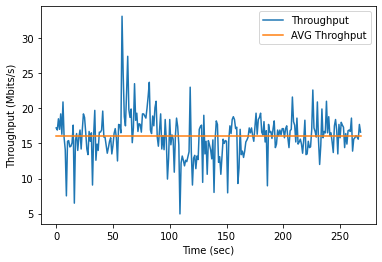

In [12]:
# Throughput 
ax = plt.gca()
df_all_new.plot(kind='line', x='Time', y='Bitrate', ax =ax)
plt.legend(["Throughput"]);
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Throughput (Mbits/s)")
avg_thr = np.ones(len(df_all_new.index),dtype = float)*avgSumThroughput
s = pd.DataFrame(avg_thr, columns = ['AVG Throghput'])
s.plot(ax=ax)
plt.show()

## Jitter

In [13]:
df_all_new['Jitter'] = df_all_new['Jitter'].astype(float) 

In [14]:
# avergae jitter 
sumThroughput = df_all_new['Jitter'].sum()
avgSumThroughput = sumThroughput/len(time)
print('avg Jitter :', avgSumThroughput)
print('var Jitter :', df_all_new['Jitter'].var())

avg Jitter : 1.309847583643123
var Jitter : 0.7859211072795874


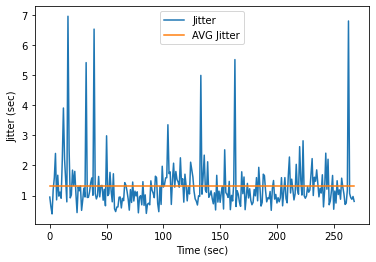

In [15]:
avg_thr = np.ones(len(df_all_new.index),dtype = float)*avgSumThroughput
J = pd.DataFrame(avg_thr, columns = ['AVG Jitter'])

ax2 = plt.gca()
df_all_new.plot(kind='line', x='Time', y='Jitter', ax =ax2)
plt.legend(["Jitter"]);
ax2.set_xlabel("Time (sec)")
ax2.set_ylabel("Jitter (sec)")
J.plot(ax=ax2)
plt.show()